In [42]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [43]:
import tweepy

In [45]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [46]:
from textblob import TextBlob

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud

In [52]:
import pandas as pd

In [51]:
import numpy as np

In [53]:
import re

In [54]:
import matplotlib.pyplot as plt

In [55]:
plt.style.use('fivethirtyeight')

In [56]:
import csv

In [57]:
import datetime

In [58]:
#Keys and access for Twitter
consumer_key = "n7rusMkwrsQJM01626yLC1urg"
consumer_secret = "zwoRMQYa3A1lc4sKEYwpI46yHkN5cBbQM2n3wZTp0IyZ8O5uGt"
access_token = "1355821685950312448-U2HcxRu5F14WBKCN1n7KFs3jBOBTbq"
access_token_secret = "ML4qvylC7gyKSGNX7DwCqlvOFjHlrj2rVqVbdq5PH0bem"

In [60]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# use API search to save search data to dataframe results

In [61]:
posts=api.user_timeline(screen_name="UBS", lang="en", count=100, tweet_mode="extended")

In [ ]:
# Print data frame if needed but above 5 results it is too big, posts

In [62]:
for tweet in posts[0:5]:        
 print(tweet.full_text + '\n')

See you in November! https://t.co/UsIF0SBBCE

UBS and @NYIslanders are thrilled to be presenting partners of @43oakfoundation to help support underrepresented student-athletes by providing resources and connections needed to achieve their goals. https://t.co/cCKVIusxdM #HockeyIsForEveryone #shareUBS https://t.co/ZYjg7eyCgy

What if something unexpected happens to me tomorrow? UBS's Carey Shuffman discusses why it's important to have tough money conversations with your partner during @createcultivate's #MoneyMoves Summit. #shareUBS https://t.co/WF9dmZNiHk

Are you looking for short, insightful, and current podcasts? Try UBS Global Research Pod Hub for podcasts on the topics that matter. Hear from our experts on ESG investing, the economy, 5G, inflation and much more. #UBSresearch #shareUBS

When you build a valuation model, data tables allow you to flex your answer for given inputs and explore different scenarios. Learn more in this video.

View more here: https://t.co/69EkYOVjOd
 #UBSR

In [63]:
print("Show results \n")
i=1
for tweet in posts[0:5]:        
 print(str(i)+ ') '+ tweet.full_text + '\n')
 i=i+1

Show results 

1) See you in November! https://t.co/UsIF0SBBCE

2) UBS and @NYIslanders are thrilled to be presenting partners of @43oakfoundation to help support underrepresented student-athletes by providing resources and connections needed to achieve their goals. https://t.co/cCKVIusxdM #HockeyIsForEveryone #shareUBS https://t.co/ZYjg7eyCgy

3) What if something unexpected happens to me tomorrow? UBS's Carey Shuffman discusses why it's important to have tough money conversations with your partner during @createcultivate's #MoneyMoves Summit. #shareUBS https://t.co/WF9dmZNiHk

4) Are you looking for short, insightful, and current podcasts? Try UBS Global Research Pod Hub for podcasts on the topics that matter. Hear from our experts on ESG investing, the economy, 5G, inflation and much more. #UBSresearch #shareUBS

5) When you build a valuation model, data tables allow you to flex your answer for given inputs and explore different scenarios. Learn more in this video.

View more here: 

In [ ]:
# Create column

In [66]:
df= pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [ ]:
# Show the first 5 rows of created column

In [67]:
df.head()

,Tweets
0,See you in November! https://t.co/UsIF0SBBCE
1,UBS and @NYIslanders are thrilled to be presen...
2,What if something unexpected happens to me tom...
3,"Are you looking for short, insightful, and cur..."
4,"When you build a valuation model, data tables ..."


In [ ]:
# Clean data

In [86]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'https','',text)
    return text

In [ ]:
# Show clean data

In [87]:
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [88]:
df

,Tweets,Subjectivity,Polarity
0,See you in November! ://t.co/UsIF0SBBCE,0.000000,0.000000
1,UBS and are thrilled to be presenting partner...,0.700000,0.600000
2,What if something unexpected happens to me tom...,0.944444,0.037037
3,"Are you looking for short, insightful, and cur...",0.300000,0.125000
4,"When you build a valuation model, data tables ...",0.533333,0.333333
...,...,...,...
95,"What's more valuable? Since the pandemic, 77% ...",0.725000,0.475000
96,It's easy to tell your friends and loved ones ...,0.822222,0.522222
97,"No matter how sophisticated your needs, we are...",0.750000,0.350000
98,"Herry Cho, Head of Sustainability and Sustaina...",0.420000,0.580000


In [ ]:
# Subjctivity function

In [89]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
# Polarity function

In [90]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# New columns

In [91]:
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)

In [92]:
df['Polarity']=df['Tweets'].apply(getPolarity)

In [93]:
df

,Tweets,Subjectivity,Polarity
0,See you in November! ://t.co/UsIF0SBBCE,0.000000,0.000000
1,UBS and are thrilled to be presenting partner...,0.700000,0.600000
2,What if something unexpected happens to me tom...,0.944444,0.037037
3,"Are you looking for short, insightful, and cur...",0.300000,0.125000
4,"When you build a valuation model, data tables ...",0.533333,0.333333
...,...,...,...
95,"What's more valuable? Since the pandemic, 77% ...",0.725000,0.475000
96,It's easy to tell your friends and loved ones ...,0.822222,0.522222
97,"No matter how sophisticated your needs, we are...",0.750000,0.350000
98,"Herry Cho, Head of Sustainability and Sustaina...",0.420000,0.580000


In [ ]:
# Create word cloud

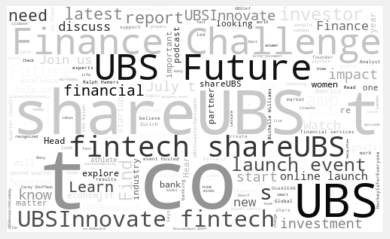

In [98]:
allWords= ' '.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500, height=300,random_state=21,max_font_size=110,background_color="white", colormap="binary").generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear" )
plt.axis('off')
plt.show()